In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

plt.style.use('default')

## **Problem 1 & 2:**

**Dataset link:** https://rb.gy/gsmddu

**Add a label to every axis and add a proper title for the charts (For every subplot, it is applicable). Also add proper labels if there are multiple representations.** Then, you can customize it as your wish.

In [2]:
powergen_df = pd.read_csv('datasets/PowerGeneration.csv')
powergen_df

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0
...,...,...,...,...,...,...,...,...,...,...,...
345268,2022-04-13,Tripura,137.0,32.00,0.00,0.0,32,0,1,0.29,0.0
345269,2022-04-13,NEEPCO.,2027.0,963.50,313.50,650.0,0,0,12,-1.59,0.0
345270,2022-04-13,NHPC,105.0,35.00,0.00,35.0,0,0,0,-0.72,0.0
345271,2022-04-13,NTPC Ltd.,750.0,250.00,0.00,250.0,0,0,11,4.45,0.0


### **Problem-1:** Make a subplots which have 2 plots.

- For the first chart, draw a scatter plot "*Monitored Cap.(MW)*" vs "*Total Cap. Under Maintenace (MW)*" of top 5 most frequent power stations. Then draw the lines which indicate the average values of these two columns. Change the colors according to the names of the Power Stations.
- For the second chart, draw a scatter plot "*Monitored Cap. (MW)*" vs "*Actual(MU)*" of the top 5 most frequent power stations. Also draw the lines which indicates the average values of these two columns. Change the colors according to the names of the Power Stations.


In [3]:
encoder = LabelEncoder()
powergen_df['codes'] = encoder.fit_transform(powergen_df['Power Station'])
powergen_df['codes'].values

array([ 41,  64,  65, ..., 110, 118, 122], shape=(345273,))

Text(0, 0.5, 'Total Cap. Under Maintanence (MW)')

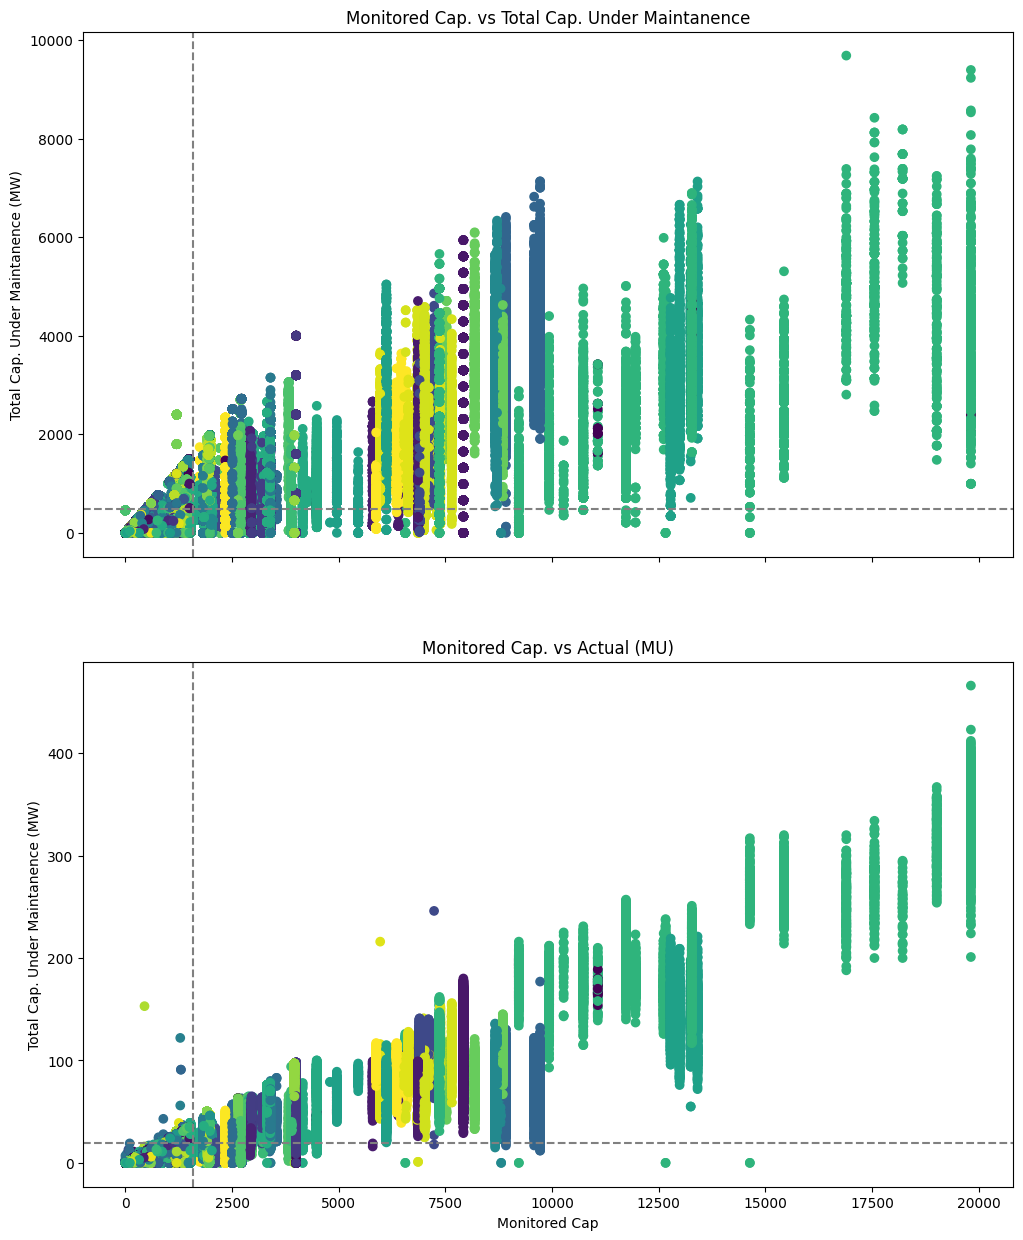

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 15), sharex=True)

# sc1 configuration
sc1 = ax[0].scatter(powergen_df['Monitored Cap.(MW)'], powergen_df['Total Cap. Under Maintenace (MW)'], c=powergen_df['codes'], label='Power Stations')
ax[0].axhline(powergen_df['Total Cap. Under Maintenace (MW)'].mean(), color='grey', linestyle='dashed')
ax[0].axvline(powergen_df['Monitored Cap.(MW)'].mean(), color='grey', linestyle='dashed')
ax[0].set_title("Monitored Cap. vs Total Cap. Under Maintanence")
ax[0].set_ylabel("Total Cap. Under Maintanence (MW)")

# sc2 configuration
sc2 = ax[1].scatter(powergen_df['Monitored Cap.(MW)'], powergen_df['Actual(MU)'], c=powergen_df['codes'], label='Power Stations')
ax[1].axhline(powergen_df['Actual(MU)'].mean(), color='grey', linestyle='dashed')
ax[1].axvline(powergen_df['Monitored Cap.(MW)'].mean(), color='grey', linestyle='dashed')
ax[1].set_title("Monitored Cap. vs Actual (MU)")
ax[1].set_xlabel("Monitored Cap")
ax[1].set_ylabel("Total Cap. Under Maintanence (MW)")

In [5]:
top5_stations = powergen_df['Power Station'].value_counts().head().index
top5_stations

Index(['NTPC Ltd.', 'NHPC', 'NPCIL', 'GMR ENERG', 'APL'], dtype='object', name='Power Station')

In [6]:
top5_df = powergen_df[powergen_df['Power Station'].isin(top5_stations)].groupby('Power Station', as_index=False)[['Monitored Cap.(MW)', 'Total Cap. Under Maintenace (MW)', 'Actual(MU)']].sum()
top5_df['codes'] = top5_df['Power Station'].astype('category').cat.codes
top5_df

,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Actual(MU),codes
0,APL,17685360.00,4800840.00,259490,0
1,GMR ENERG,3579180.00,874510.00,53380,1
2,NHPC,10365946.80,1965015.20,121046,2
3,NPCIL,12785520.00,2985520.00,220410,3
4,NTPC Ltd.,93404868.22,21006777.53,1467294,4


In [7]:
top5_df['Monitored Cap.(MW)'].values

array([17685360.  ,  3579180.  , 10365946.8 , 12785520.  , 93404868.22])

Text(0.5, 1.0, 'Monitored Cap. vs Actual MU')

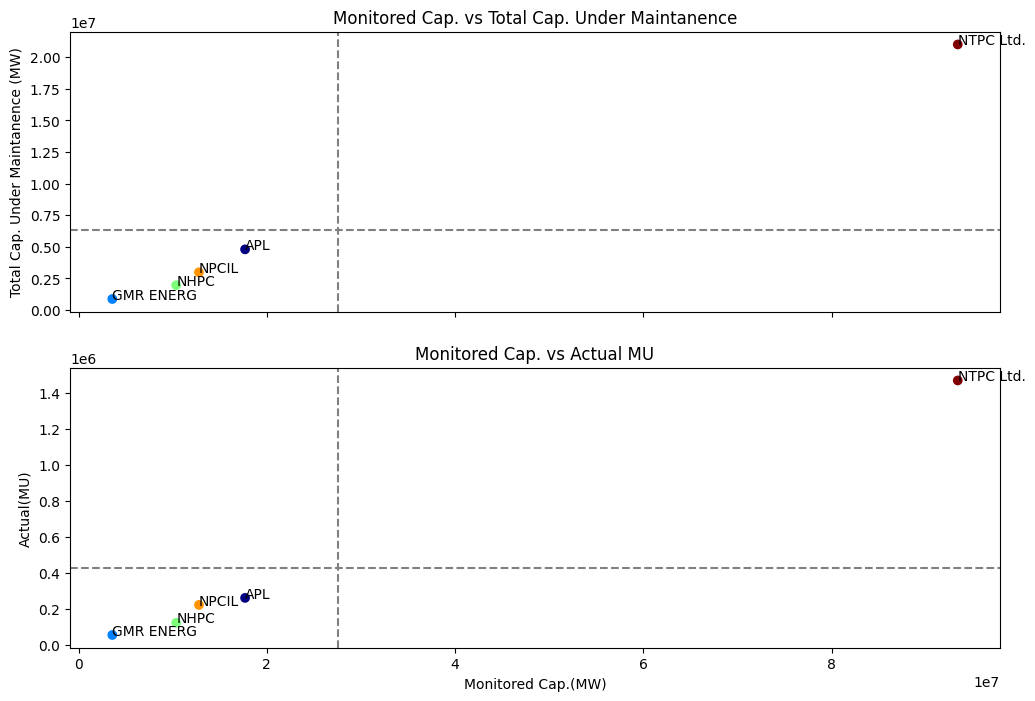

In [ ]:
# scatterplot for added Monitored Cap, Total Cap Under Maintanence, and Actual (MU) for each company
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# configurin ax[0]
ax[0].scatter(top5_df['Monitored Cap.(MW)'], top5_df['Total Cap. Under Maintenace (MW)'], c=top5_df['codes'], cmap='jet')

for i in range(top5_df.shape[0]):
    ax[0].text(
        top5_df['Monitored Cap.(MW)'].values[i],
        top5_df['Total Cap. Under Maintenace (MW)'].values[i],
        top5_df['Power Station'].values[i]
    )

# ax[0].title("")
ax[0].axhline(top5_df['Total Cap. Under Maintenace (MW)'].mean(), color='grey', linestyle='dashed')
ax[0].axvline(top5_df['Monitored Cap.(MW)'].mean(), color='grey', linestyle='dashed')
ax[0].set_ylabel("Total Cap. Under Maintanence (MW)")
ax[0].set_title("Monitored Cap. vs Total Cap. Under Maintanence")

# configurin ax[1]
ax[1].scatter(top5_df['Monitored Cap.(MW)'], top5_df['Actual(MU)'], c=top5_df['codes'], cmap='jet')

for i in range(top5_df.shape[0]):
    ax[1].text(
        top5_df['Monitored Cap.(MW)'].values[i],
        top5_df['Actual(MU)'].values[i],
        top5_df['Power Station'].values[i]
    )

ax[1].axhline(top5_df['Actual(MU)'].mean(), color='grey', linestyle='dashed')
ax[1].axvline(top5_df['Monitored Cap.(MW)'].mean(), color='grey', linestyle='dashed')
ax[1].set_xlabel("Monitored Cap.(MW)")
ax[1].set_ylabel("Actual(MU)")
ax[1].set_title("Monitored Cap. vs Actual MU")

/tmp/ipykernel_3877/2048946710.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


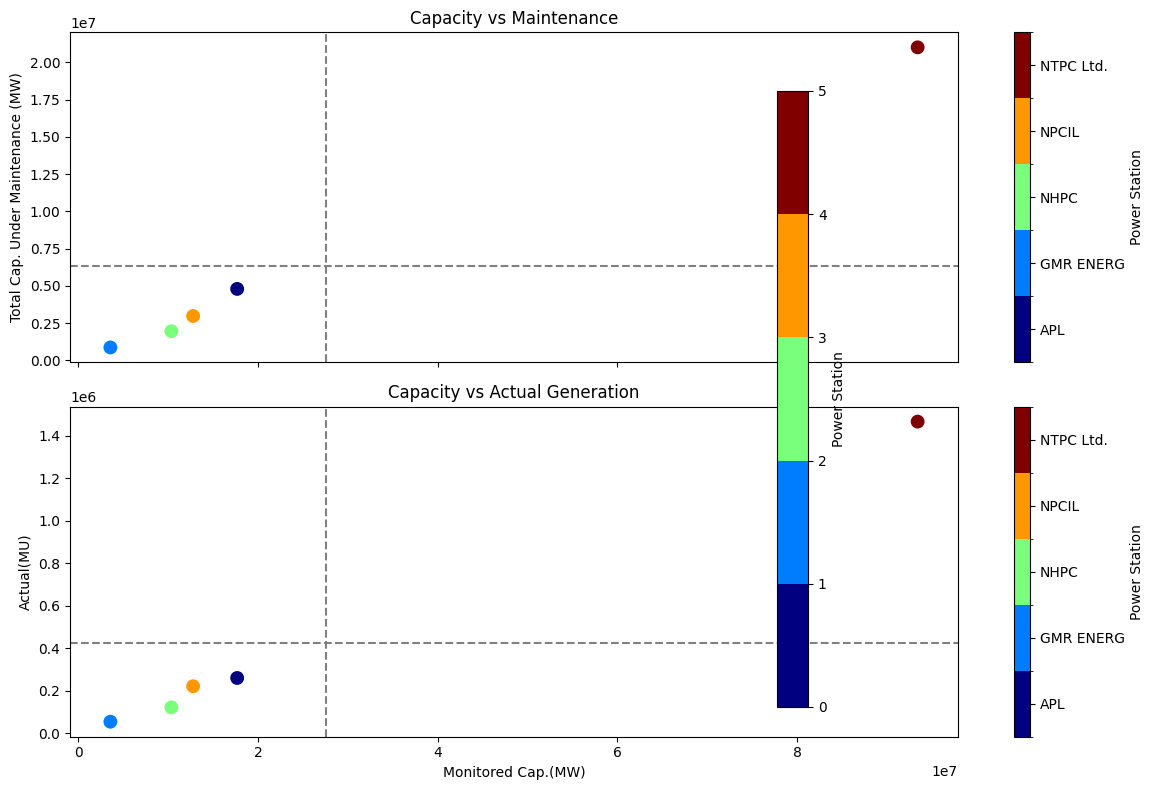

In [9]:
# doing the same thing using pandas for an added color label bar
top5_df['Power Station'] = top5_df['Power Station'].astype('category')

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# ---- Top subplot ----
top5_df.plot(
    kind='scatter',
    x='Monitored Cap.(MW)',
    y='Total Cap. Under Maintenace (MW)',
    c='Power Station',
    cmap='jet',
    ax=axes[0],
    s=80,  # marker size
    title='Capacity vs Maintenance'
)

axes[0].axhline(top5_df['Total Cap. Under Maintenace (MW)'].mean(), color='gray', linestyle='--')
axes[0].axvline(top5_df['Monitored Cap.(MW)'].mean(), color='gray', linestyle='--')
axes[0].set_ylabel("Total Cap. Under Maintenance (MW)")

# ---- Bottom subplot ----
top5_df.plot(
    kind='scatter',
    x='Monitored Cap.(MW)',
    y='Actual(MU)',
    c='Power Station',
    cmap='jet',
    ax=axes[1],
    s=80,
    title='Capacity vs Actual Generation'
)

axes[1].axhline(top5_df['Actual(MU)'].mean(), color='gray', linestyle='--')
axes[1].axvline(top5_df['Monitored Cap.(MW)'].mean(), color='gray', linestyle='--')
axes[1].set_ylabel("Actual(MU)")
axes[1].set_xlabel("Monitored Cap.(MW)")

# ---- Add shared colorbar ----
# grab the last scatter collection
sm = axes[1].collections[0]
cbar = fig.colorbar(sm, ax=axes, pad=0.02)
cbar.set_label("Power Station")

plt.tight_layout()
plt.show()


### **Problem-2:** Draw a 3D Scatter plot between "*Monitored Cap.(MW)*", "*Total Cap. Under Maintenace (MW)*" and "*Forced Maintanence(MW)*"

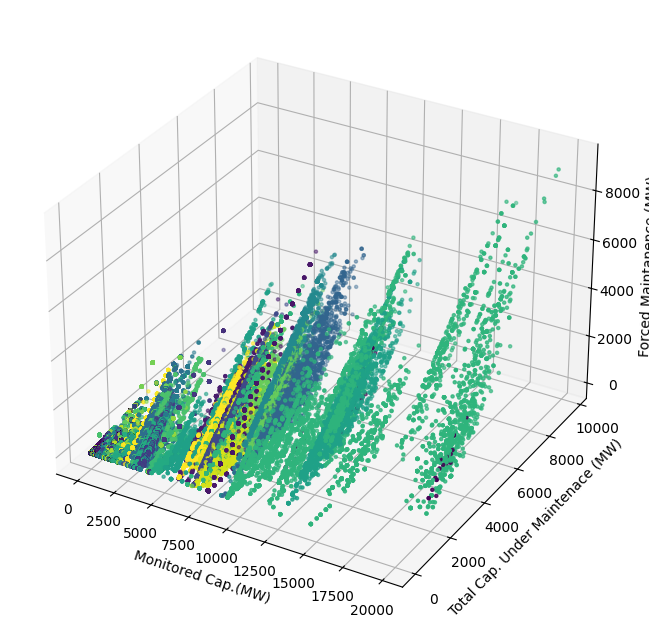

In [34]:
fig = plt.figure(figsize=(8, 8))

sc3d = fig.add_subplot(projection='3d')
sc3d.scatter3D(powergen_df['Monitored Cap.(MW)'], powergen_df['Total Cap. Under Maintenace (MW)'], powergen_df['Forced Maintanence(MW)'], c=powergen_df['codes'], marker='.')
sc3d.set_xlabel("Monitored Cap.(MW)")
sc3d.set_ylabel("Total Cap. Under Maintenace (MW)")
sc3d.set_zlabel("Forced Maintanence (MW)")

plt.show()

### **Problem-3:** Make a 3D *Surface* plot of this below mathematical equation.

$$z = |x| - |y|$$

In [134]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

xx, yy = np.meshgrid(x, y)

z = np.abs(xx) - np.abs(yy)
z

array([[ 0.00000000e+00, -2.02020202e-01, -4.04040404e-01, ...,
        -4.04040404e-01, -2.02020202e-01,  0.00000000e+00],
       [ 2.02020202e-01,  0.00000000e+00, -2.02020202e-01, ...,
        -2.02020202e-01,  1.77635684e-15,  2.02020202e-01],
       [ 4.04040404e-01,  2.02020202e-01,  0.00000000e+00, ...,
         0.00000000e+00,  2.02020202e-01,  4.04040404e-01],
       ...,
       [ 4.04040404e-01,  2.02020202e-01,  0.00000000e+00, ...,
         0.00000000e+00,  2.02020202e-01,  4.04040404e-01],
       [ 2.02020202e-01, -1.77635684e-15, -2.02020202e-01, ...,
        -2.02020202e-01,  0.00000000e+00,  2.02020202e-01],
       [ 0.00000000e+00, -2.02020202e-01, -4.04040404e-01, ...,
        -4.04040404e-01, -2.02020202e-01,  0.00000000e+00]],
      shape=(100, 100))

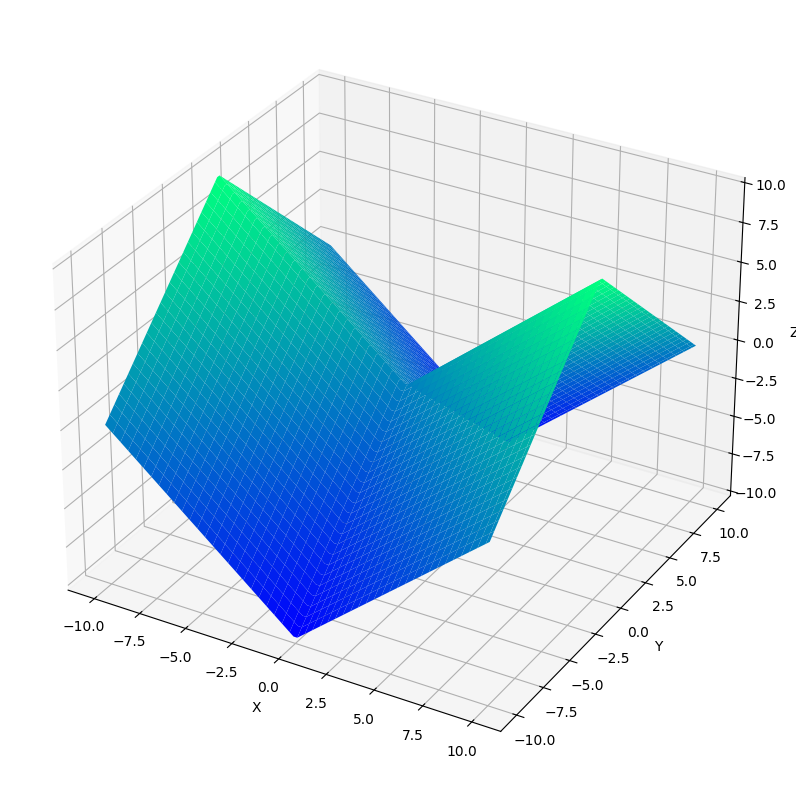

In [135]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(projection='3d')
ax.plot_surface(xx, yy, z, cmap='winter')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### **Problem-4:** Draw the 3D *Contour plot* of this below equation:

$$z = |x| - |y|$$

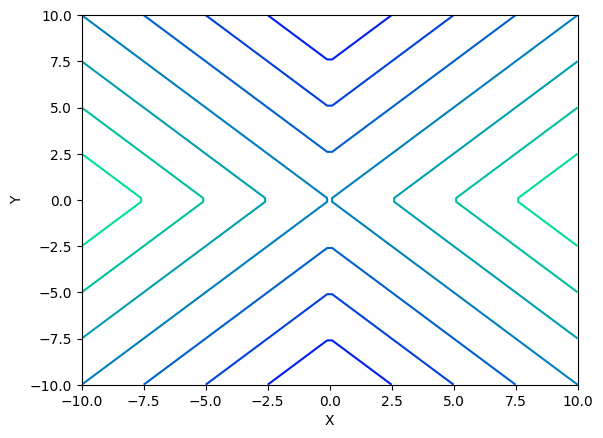

In [136]:
fig = plt.figure()

ax = fig.add_subplot()
ax.contour(xx, yy, z, cmap='winter')

ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

### **Problem-5:** Draw a second type of Countour plot of the below equation:

$$z = |x| - |y|$$

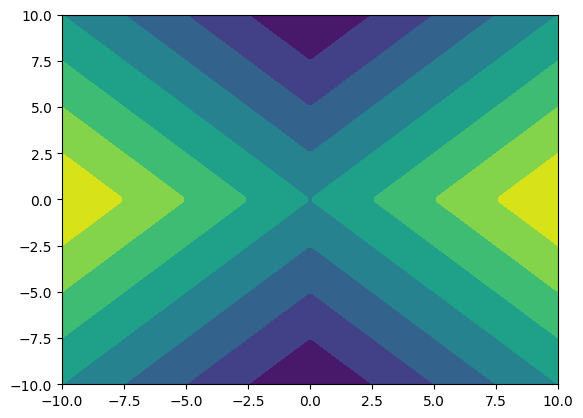

In [137]:
fig = plt.figure()

ax = fig.add_subplot()
ax.contourf(xx, yy, z)

## `Problem 6-7`

Data Set Link - https://docs.google.com/spreadsheets/d/17tUL2yC7MGvo7txuuhLtAI-b6_C4jc0t7FLFxqRm-uI/edit?usp=share_link


**Description of Dataset:**

* Date: It gives the date of which stocks details are given.
* Symbol: Name of stock
* Open: It gives the opening price of stock on that date.
* High: It gives the highest price to which the stock ascened on that day.
* Low: It gives the highest price to which the stock plummeted on that day.
* Close: It gives the closing price of stock on that date.
* Volume: It gives the amount of stock traded on that date.
* VWAP: The volume-weighted average price (VWAP) is a statistic used by traders to determine what the average price is based on both price and volume.
* Turnover:

In [15]:
nifty_df = pd.read_csv("datasets/nifty-50.csv")
nifty_df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
480991,2021-04-26,POWERGRID,EQ,211.15,208.20,216.45,208.20,215.75,215.80,213.23,10765892,2.295642e+14,72260.0
480992,2021-04-27,POWERGRID,EQ,215.80,216.05,220.50,215.80,216.40,216.65,217.89,8589721,1.871605e+14,77004.0
480993,2021-04-28,POWERGRID,EQ,216.65,218.80,221.70,216.30,221.35,220.90,219.20,9215766,2.020103e+14,55866.0
480994,2021-04-29,POWERGRID,EQ,220.90,223.10,223.65,219.05,219.80,220.15,220.60,8303610,1.831748e+14,48655.0


### `Problem-6` Use Pandas plot functions

* Line plot of closing value of top 5 Stocks in Year 2020.
* Take top 5 stocks based on total turnover in Year 2020

In [44]:
# converting Date col to Datetime type
nifty_df['Date'] = pd.to_datetime(nifty_df['Date'])

In [47]:
# for the year 2020 filter
fy2020 = nifty_df[nifty_df['Date'].dt.year == 2020]

In [53]:
# filtering top 5 stocks based on turnover, for the year 2020
top5_filter = fy2020.groupby('Symbol')['Turnover'].sum().sort_values(ascending=False).head()
top5_filter

Symbol
RELIANCE      1.551544e+18
BAJFINANCE    1.025129e+18
HDFCBANK      7.704609e+17
ICICIBANK     6.961710e+17
SBIN          6.628064e+17
Name: Turnover, dtype: float64

In [57]:
top5_stocks = fy2020[fy2020['Symbol'].isin(top5_filter.index)]
top5_stocks

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
4974,2020-01-01,HDFCBANK,EQ,1272.10,1276.10,1280.00,1270.60,1279.00,1278.60,1276.64,1836849,2.345001e+14,46625.0
4975,2020-01-02,HDFCBANK,EQ,1278.60,1279.00,1288.00,1279.00,1286.00,1286.75,1284.56,3068583,3.941792e+14,104570.0
4976,2020-01-03,HDFCBANK,EQ,1286.75,1282.20,1285.00,1263.60,1268.50,1268.40,1270.48,5427775,6.895886e+14,157066.0
4977,2020-01-06,HDFCBANK,EQ,1268.40,1260.00,1261.80,1236.00,1240.25,1240.95,1247.24,5445093,6.791348e+14,155007.0
4978,2020-01-07,HDFCBANK,EQ,1240.95,1258.90,1271.45,1252.25,1261.00,1260.60,1261.48,7362247,9.287302e+14,189026.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
464158,2020-12-24,SBIN,EQ,263.00,265.00,268.85,264.65,266.85,266.85,267.02,28585509,7.632821e+14,167695.0
464159,2020-12-28,SBIN,EQ,266.85,268.75,276.00,268.00,275.75,275.20,272.23,36870242,1.003740e+15,203967.0
464160,2020-12-29,SBIN,EQ,275.20,276.30,279.90,274.70,277.75,277.90,277.56,45032526,1.249930e+15,237470.0
464161,2020-12-30,SBIN,EQ,277.90,278.00,278.70,272.50,275.50,276.90,275.47,30971894,8.531681e+14,163939.0


In [59]:
top5_stocks.pivot_table(values='Turnover', index='Date', columns='Symbol')

Symbol,BAJFINANCE,HDFCBANK,ICICIBANK,RELIANCE,SBIN
Date,,,,,
2020-01-01,1.723965e+14,2.345001e+14,4.111822e+14,9.701063e+14,5.805130e+14
2020-01-02,3.687085e+14,3.941792e+14,5.536966e+14,1.239470e+15,6.845341e+14
2020-01-03,4.948734e+14,6.895886e+14,5.166326e+14,1.470430e+15,7.322600e+14
2020-01-06,1.161840e+15,6.791348e+14,6.612006e+14,1.695490e+15,1.147880e+15
2020-01-07,8.668490e+14,9.287302e+14,8.480927e+14,1.161710e+15,1.632870e+15
...,...,...,...,...,...
2020-12-24,1.355180e+15,1.041580e+15,9.008152e+14,1.894900e+15,7.632821e+14
2020-12-28,1.008310e+15,8.273856e+14,7.499174e+14,1.594880e+15,1.003740e+15
2020-12-29,1.025790e+15,1.035000e+15,1.001610e+15,1.711840e+15,1.249930e+15


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

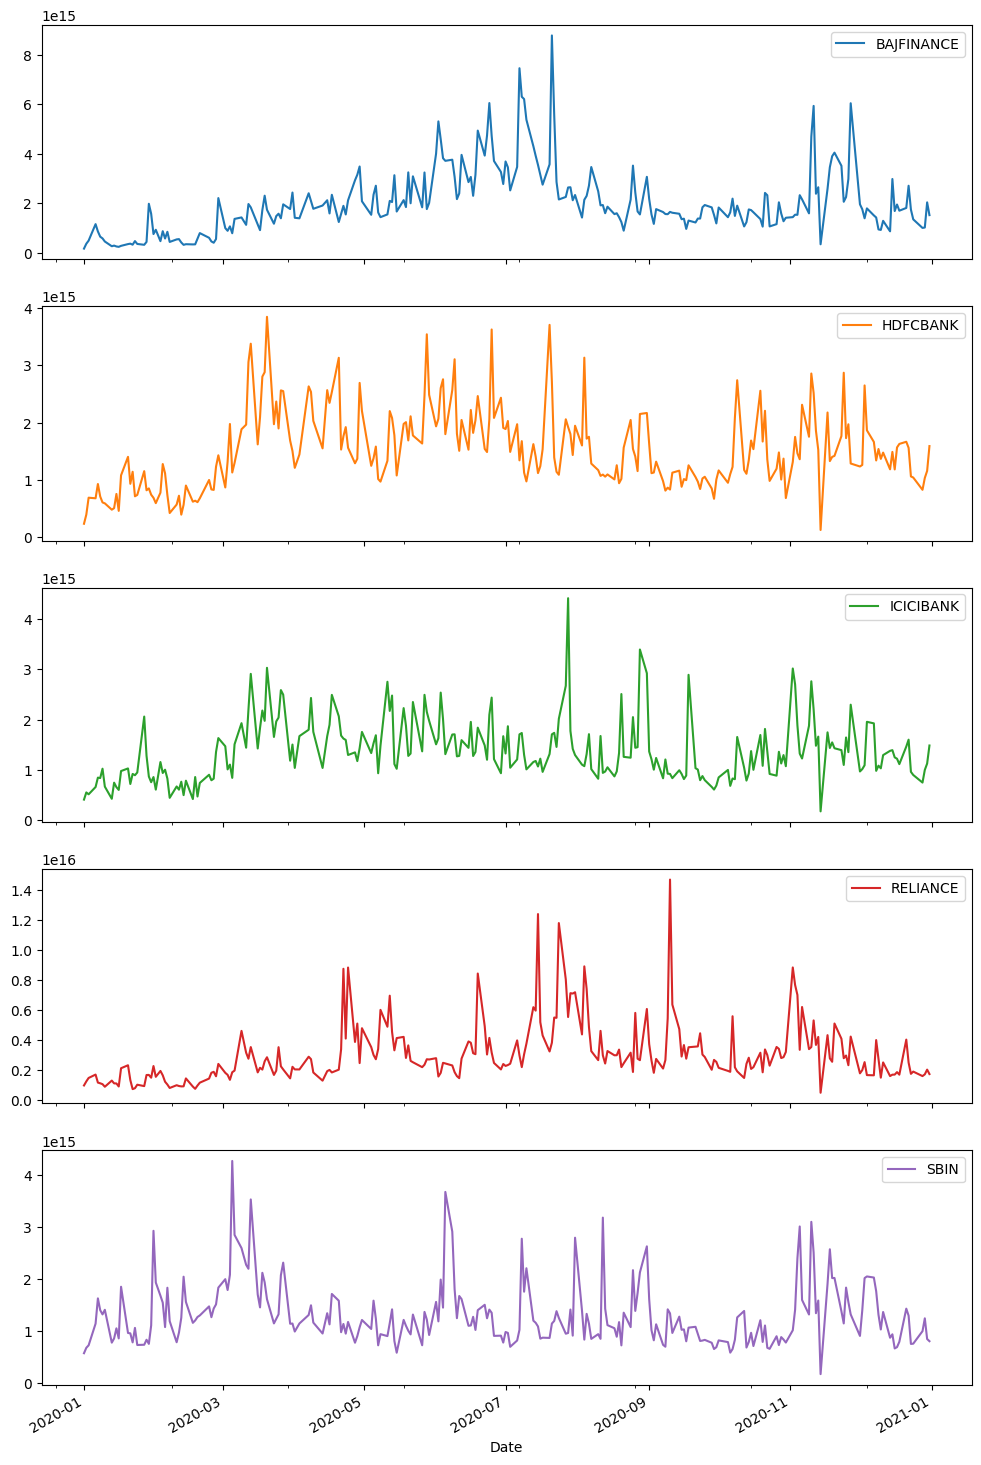

In [62]:
top5_stocks.pivot_table(values='Turnover', index='Date', columns='Symbol').plot(kind='line', subplots=True, figsize=(12, 20))

### `Problem-7` Scatter plot Close price vs Volume for TOP-5 Stocks in year 2021
* Color on Symbol Column

In [116]:
fy2021 = nifty_df[nifty_df['Date'].dt.year == 2021]
fy2021.sample(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
392795,2021-02-02,DRREDDY,EQ,4428.15,4469.00,4528.00,4381.00,4492.05,4482.50,4452.89,3675106,1.636480e+15,199921.0
384700,2021-02-25,COALINDIA,EQ,144.40,146.90,157.70,145.75,156.90,156.10,152.65,85580477,1.306410e+15,310743.0
142326,2021-04-23,BHARTIARTL,EQ,530.85,529.00,532.45,519.10,522.75,522.60,525.85,6992388,3.676918e+14,94602.0
223862,2021-04-27,INDUSINDBK,EQ,859.55,859.55,886.00,859.00,883.55,882.45,873.46,5202133,4.543845e+14,96508.0
265422,2021-01-25,NESTLEIND,EQ,17589.60,17652.00,17700.00,17229.85,17400.00,17415.25,17359.48,116436,2.021269e+14,27225.0


In [117]:
# mask for top 5 companies based on Turnover for the year 2021
top5fy2021 = fy2021.groupby('Symbol')['Turnover'].sum().sort_values(ascending=False).head()
top5fy2021

Symbol
TATAMOTORS    4.480973e+17
RELIANCE      3.550131e+17
SBIN          2.901291e+17
TATASTEEL     2.791109e+17
HDFCBANK      2.431887e+17
Name: Turnover, dtype: float64

In [118]:
# filtering top 5 companies for the year 2021 on the basis of turnover
top5fy21_df = fy2021[fy2021['Symbol'].isin(top5fy2021.index)]

In [ ]:
# converting symbol col to category type
# do not use this code before applying the filters,
# or it will result in identification of each 
# category as unique everytime
top5fy21_df['Symbol'] = top5fy21_df['Symbol'].astype('category')

/tmp/ipykernel_3877/2930020346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5fy21_df['Symbol'] = top5fy21_df['Symbol'].astype('category')


<Axes: xlabel='Close', ylabel='Volume'>

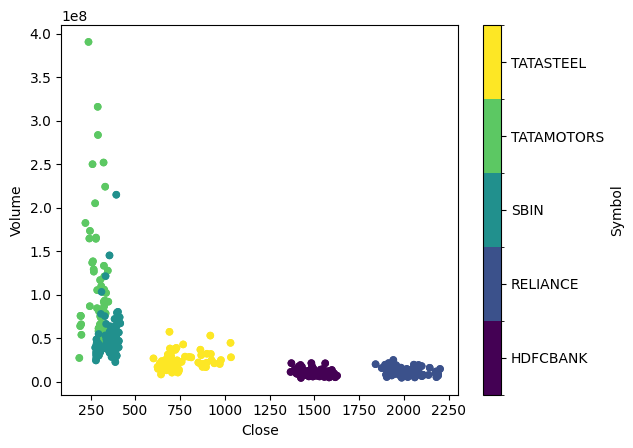

In [125]:
top5fy21_df.plot(kind='scatter', x='Close', y='Volume', c='Symbol', cmap='viridis')

### `Problem-8` Create a 3-D Scatter Plot using `time,x,y` on below synthetic data. and give color gradiant on `z`
```
# Create a 3D dataset
time = np.linspace(0, 10, 100)
x = np.sin(time)
y = np.cos(time)
z = time

# Create a DataFrame from the dataset
data = pd.DataFrame({'time': time, 'x': x, 'y': y, 'z': z})
```

In [127]:
# Create a 3D dataset
time = np.linspace(0, 10, 100)
x = np.sin(time)
y = np.cos(time)
z = time

# Create a DataFrame from the dataset
data = pd.DataFrame({'time': time, 'x': x, 'y': y, 'z': z})
data

,time,x,y,z
0,0.00000,0.000000,1.000000,0.00000
1,0.10101,0.100838,0.994903,0.10101
2,0.20202,0.200649,0.979663,0.20202
3,0.30303,0.298414,0.954437,0.30303
4,0.40404,0.393137,0.919480,0.40404
...,...,...,...,...
95,9.59596,-0.170347,-0.985384,9.59596
96,9.69697,-0.268843,-0.963184,9.69697
97,9.79798,-0.364599,-0.931165,9.79798
98,9.89899,-0.456637,-0.889653,9.89899


Text(0.5, 0.92, 'Vibration Characteristics of a Car Body')

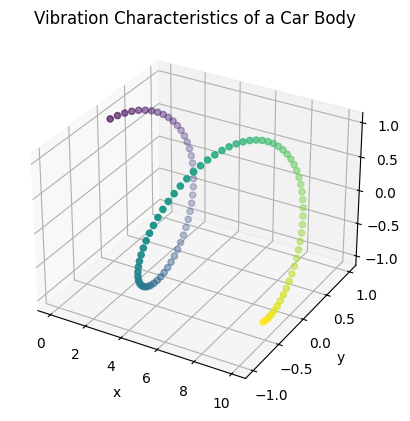

In [130]:
fig = plt.figure()

ax = fig.add_subplot(projection='3d')

ax.scatter3D(data['time'], data['x'], data['y'], c=data['z'])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Vibration Characteristics of a Car Body")

### `Problem 9:` Create a surface plot and the 2 types of the contour plots of the below equation.

$$z = sin(\sqrt{x^2 + y^2})$$


In [ ]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

xx, yy = np.meshgrid(x, y)

# z = np.sin(np.sqrt((x ** 2) + (y ** 2)))
z = np.sin(np.sqrt(xx**2 + yy**2))
z

array([[0.99998766, 0.99060935, 0.96166494, ..., 0.96166494, 0.99060935,
        0.99998766],
       [0.99060935, 0.96085316, 0.9119285 , ..., 0.9119285 , 0.96085316,
        0.99060935],
       [0.96166494, 0.9119285 , 0.8438217 , ..., 0.8438217 , 0.9119285 ,
        0.96166494],
       ...,
       [0.96166494, 0.9119285 , 0.8438217 , ..., 0.8438217 , 0.9119285 ,
        0.96166494],
       [0.99060935, 0.96085316, 0.9119285 , ..., 0.9119285 , 0.96085316,
        0.99060935],
       [0.99998766, 0.99060935, 0.96166494, ..., 0.96166494, 0.99060935,
        0.99998766]], shape=(100, 100))

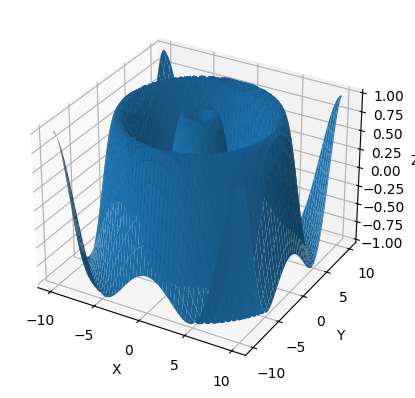

In [147]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(xx, yy, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### `Problem 10:` Create a surface plot and the 2 types of the contour plots of the below equation.

$$z = tan(\log_2({x^2 + y^2})$$

In [4]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

xx, yy = np.meshgrid(x, y)

z = np.tan(np.log2(xx**2 + yy**2))
z

array([[4.68881307, 4.09933782, 3.63588588, ..., 3.63588588, 4.09933782,
        4.68881307],
       [4.09933782, 3.62718585, 3.24701686, ..., 3.24701686, 3.62718585,
        4.09933782],
       [3.63588588, 3.24701686, 2.9278268 , ..., 2.9278268 , 3.24701686,
        3.63588588],
       ...,
       [3.63588588, 3.24701686, 2.9278268 , ..., 2.9278268 , 3.24701686,
        3.63588588],
       [4.09933782, 3.62718585, 3.24701686, ..., 3.24701686, 3.62718585,
        4.09933782],
       [4.68881307, 4.09933782, 3.63588588, ..., 3.63588588, 4.09933782,
        4.68881307]], shape=(100, 100))

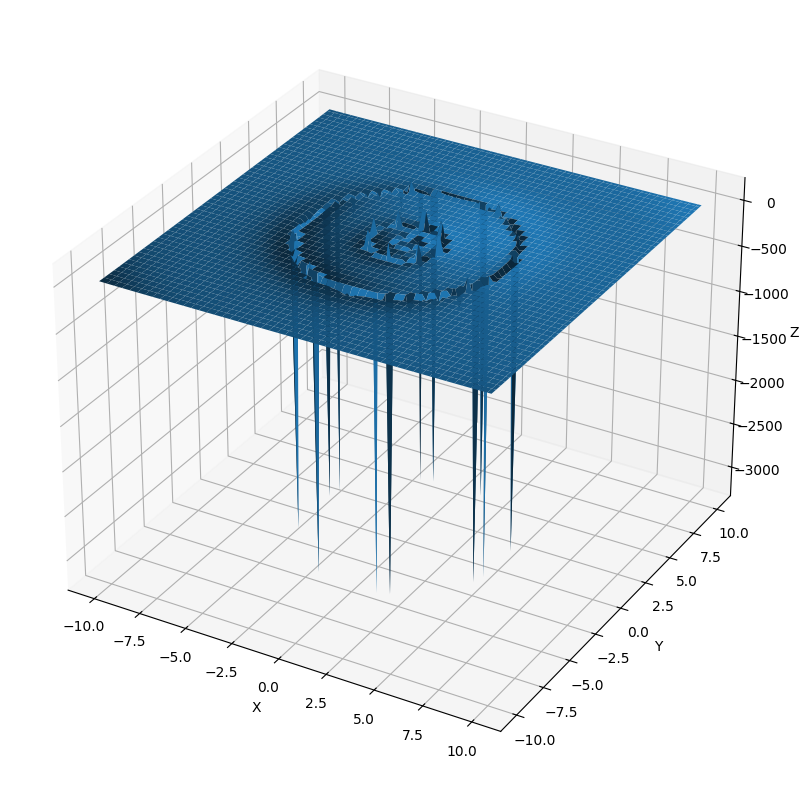

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(xx, yy, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()